In [1]:
import matplotlib.pyplot as plt
import matplotlib.image as image
import pandas as pd
import numpy as np
import os
import random
from PIL import Image

In [2]:
image_data_path = "./dsc630_final_project/Train/"
folders = os.listdir(image_data_path)
list_of_images=[]
pixel_matrix = []
newIm = []
labels=[]

# Get list of folders in current path
for folder in folders:
    
    #Creating path name with folder details to get files.
    newPath = image_data_path + folder
    folderName = os.path.split(os.path.abspath(newPath))[1]
    
    # Letters file have two underscore in their name where as for digits its 1.
    try:
        characterName = folderName.split("_")[2]
    except IndexError as err:
        characterName = folderName.split("_")[1]
    except Exception as err:
        print(f"Invalid File Name:{folderName}, {err}")
    
    #Add PNG files to the list.
    list_of_images=[f for f in os.listdir(newPath) if os.path.splitext(f)[-1] == '.png'] 
    
    # Create labels and image dimensions.
    for image in list_of_images:   
        im = Image.open(newPath+"//"+image)
        labels.append(characterName)
        imageArray = np.asarray(im.getdata())
        flattenedImageArray = imageArray.flatten()
        pixel_matrix.append(flattenedImageArray)

print("Image Matrix Size = ",np.size(pixel_matrix))

Image Matrix Size =  80076800


In [3]:
image_pixel_array = np.array(pixel_matrix)
print(image_pixel_array.shape)

(78200, 1024)


In [4]:
image_pixel_array

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [5]:
images_df = pd.DataFrame({'label': labels, 'pixels': list(image_pixel_array)}, columns=['label', 'pixels'])
print(images_df.shape)
images_df.head()

(78200, 2)


,label,pixels
0,yna,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
1,yna,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
2,yna,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
3,yna,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
4,yna,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."


In [6]:
images_df.tail()

,label,pixels
78195,9,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
78196,9,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
78197,9,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
78198,9,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
78199,9,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."


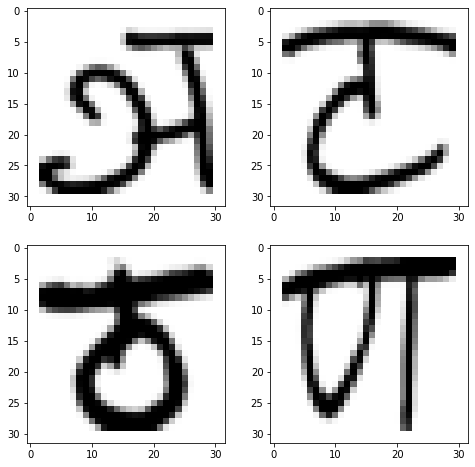

In [7]:
fig, ax = plt.subplots(2,2, figsize=(8,8))
# ax[0,0].imshow(images_df[2].reshape(32,32), cmap="binary")

x = images_df['pixels'][2].reshape(32,32)
ax[0,0].imshow(images_df['pixels'][2].reshape(32,32), cmap="binary")
ax[0,1].imshow(images_df['pixels'][1701].reshape(32,32), cmap="binary")
ax[1,0].imshow(images_df['pixels'][5000].reshape(32,32), cmap="binary")
ax[1,1].imshow(images_df['pixels'][10000].reshape(32,32), cmap="binary")

In [8]:
images_df.groupby("label").count()

,pixels
label,
0,1700
1,1700
2,1700
3,1700
4,1700
5,1700
6,1700
7,1700
8,1700


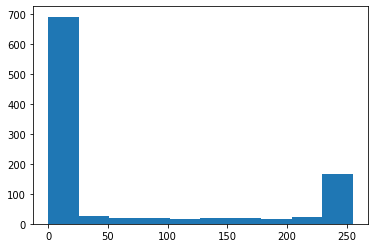

In [9]:
x = images_df.loc[images_df["label"] == "kha",'pixels'].iloc[0]
plt.hist(x)
plt.show()

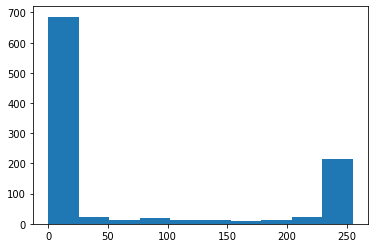

In [10]:
x = images_df.loc[images_df["label"] == "1",'pixels'].iloc[0]
plt.hist(x)
plt.show()

In [11]:
#define variables
n_samples = len(image_pixel_array)
X = image_pixel_array.reshape((n_samples,-1))
T = np.array(labels)
print('Features size = ',X.shape)
print('Labels size = ',T.shape)
print(T)

Features size =  (78200, 1024)
Labels size =  (78200,)
['yna' 'yna' 'yna' ... '9' '9' '9']


In [12]:
#Verify if we got all the letters and numbers. I am expecting to get 36 Letters + 10 Digits = 46 labels.
print(len(set(labels)))

46


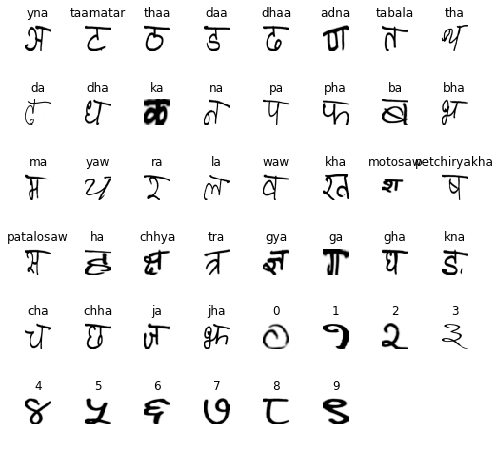

In [13]:
image_character = images_df.label.unique()  
rows =6;columns=8;
fig, ax = plt.subplots(rows,columns, figsize=(8,8))
for row in range(rows):
    for col in range(columns):
        ax[row,col].set_axis_off()
        if columns*row+col < len(image_character):
            x = images_df[images_df.label==image_character[columns*row+col]].iloc[0,:-1].values
            x = images_df.loc[images_df["label"] == x[0],'pixels'].iloc[0]
            x = x.reshape(32,32)
            ax[row,col].imshow(x, cmap="binary")
            ax[row,col].set_title(image_character[columns*row+col].split("_")[-1])

            
plt.subplots_adjust(wspace=1)   
plt.show()

In [14]:
#transform Categorical variables using one hot encoder
import keras
from sklearn import ensemble,preprocessing
le=preprocessing.LabelEncoder()
le.fit(T)
T=le.transform(T)

T=keras.utils.np_utils.to_categorical(T)

Using TensorFlow backend.
C:\Users\bhush\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\bhush\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\bhush\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\bhush\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py

In [15]:
#Print Mapping of one hot encoding
le_name_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
print(le_name_mapping)

{'0': 0, '1': 1, '2': 2, '3': 3, '4': 4, '5': 5, '6': 6, '7': 7, '8': 8, '9': 9, 'adna': 10, 'ba': 11, 'bha': 12, 'cha': 13, 'chha': 14, 'chhya': 15, 'da': 16, 'daa': 17, 'dha': 18, 'dhaa': 19, 'ga': 20, 'gha': 21, 'gya': 22, 'ha': 23, 'ja': 24, 'jha': 25, 'ka': 26, 'kha': 27, 'kna': 28, 'la': 29, 'ma': 30, 'motosaw': 31, 'na': 32, 'pa': 33, 'patalosaw': 34, 'petchiryakha': 35, 'pha': 36, 'ra': 37, 'taamatar': 38, 'tabala': 39, 'tha': 40, 'thaa': 41, 'tra': 42, 'waw': 43, 'yaw': 44, 'yna': 45}


### Create CNN Model

In [16]:
import numpy as np
import keras
from keras import models, layers, losses, optimizers, metrics
from keras.utils import to_categorical
from sklearn.preprocessing import StandardScaler,LabelEncoder,OneHotEncoder
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
%matplotlib inline
from keras.layers import Dense, Conv2D, MaxPool2D, Flatten, Dropout
from keras.models import Sequential

In [17]:
img_height_rows = 32
img_width_cols = 32

In [18]:
#Train test split
X_train, X_test, T_train, T_test = train_test_split(X, T, test_size=0.3, random_state=34)
print('Train size = ',X_train.shape," ",T_train.shape)

Train size =  (54740, 1024)   (54740, 46)


In [19]:
im_shape = (img_height_rows, img_width_cols, 1)
print(im_shape)
x_train = X_train.reshape(X_train.shape[0], *im_shape) # Python TIP :the * operator unpacks the tuple
x_test = X_test.reshape(X_test.shape[0], *im_shape)

(32, 32, 1)


In [20]:
def get_model(kernelSize = (3, 3), 
              ip_activation ="relu",
              n_classes = 46,
              op_activation = 'softmax',
              learn_rate=0.001,
              loss = 'categorical_crossentropy',
              metrics = ['accuracy']
              ):
    
    # ip_conv_0 = Conv2D(filters=32, kernel_size=kernelSize, input_shape=im_shape, activation=ip_activation)

    cnn = Sequential()
    cnn.add(Conv2D(filters=32, kernel_size=kernelSize, input_shape=im_shape, activation=ip_activation))

    # Add the next Convolutional+Activation layer
    # ip_conv_0_1 = Conv2D(filters=4, kernel_size=kernelSize, activation=ip_activation)
    cnn.add(Conv2D(filters=4, kernel_size=kernelSize, activation=ip_activation))

    # Add the Pooling layer
    # pool_0 = MaxPool2D(pool_size=(2, 2), strides=(2, 2), padding="same")
    cnn.add(MaxPool2D(pool_size=(2, 2), strides=(2, 2), padding="same"))

    # ip_conv_1 = Conv2D(filters=4, kernel_size=kernelSize, activation=ip_activation)
    cnn.add(Conv2D(filters=4, kernel_size=kernelSize, activation=ip_activation))

    # ip_conv_1_1 = Conv2D(filters=4, kernel_size=kernelSize, activation=ip_activation)
    cnn.add(Conv2D(filters=4, kernel_size=kernelSize, activation=ip_activation))

    # pool_1 = MaxPool2D(pool_size=(2, 2), strides=(2, 2), padding="same")
    cnn.add(MaxPool2D(pool_size=(2, 2), strides=(2, 2), padding="same"))

    # flat_layer_0 = Flatten()
    cnn.add(Flatten())

    # Now add the Dense layers
    # h_dense_0 = Dense(units=20, activation=ip_activation, kernel_initializer='uniform')
    cnn.add(Dense(units=20, activation=ip_activation, kernel_initializer='uniform'))

    # Let's add one more before proceeding to the output layer
    # h_dense_1 = Dense(units=1024, activation=ip_activation, kernel_initializer='uniform',name='dense11')
    cnn.add(Dense(units=1024, activation=ip_activation, kernel_initializer='uniform',name='dense11'))

    # output_layer = Dense(units=n_classes, activation=op_activation, kernel_initializer='uniform')
    cnn.add(Dense(units=n_classes, activation=op_activation, kernel_initializer='uniform'))

    opt = optimizers.Adagrad(lr=learn_rate)
    # Compile the classifier using the configuration we want
    cnn.compile(optimizer=opt, loss=loss, metrics=metrics)
    
    return cnn

In [22]:
cnn = get_model()
print(cnn.summary())


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 30, 30, 32)        320       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 28, 28, 4)         1156      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 4)         0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 12, 12, 4)         148       
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 10, 10, 4)         148       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 5, 5, 4)           0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 100)             

In [23]:
from sklearn.model_selection import GridSearchCV
from keras.wrappers.scikit_learn import KerasClassifier

In [24]:
history = cnn.fit(x_train, T_train,
                  batch_size=100, epochs=10,
                  validation_data=(x_test, T_test))


Train on 54740 samples, validate on 23460 samples
Epoch 1/10
54740/54740 [==============================] - 36s 651us/step - loss: 2.2490 - accuracy: 0.4037 - val_loss: 1.8376 - val_accuracy: 0.5037
Epoch 2/10
54740/54740 [==============================] - 49s 898us/step - loss: 1.6313 - accuracy: 0.5537 - val_loss: 1.4751 - val_accuracy: 0.5908
Epoch 3/10
54740/54740 [==============================] - 59s 1ms/step - loss: 1.3577 - accuracy: 0.6201 - val_loss: 1.2674 - val_accuracy: 0.6452
Epoch 4/10
54740/54740 [==============================] - 58s 1ms/step - loss: 1.1918 - accuracy: 0.6641 - val_loss: 1.1485 - val_accuracy: 0.6727
Epoch 5/10
54740/54740 [==============================] - 58s 1ms/step - loss: 1.0806 - accuracy: 0.6944 - val_loss: 1.0447 - val_accuracy: 0.7020
Epoch 6/10
54740/54740 [==============================] - 58s 1ms/step - loss: 0.9971 - accuracy: 0.7155 - val_loss: 0.9845 - val_accuracy: 0.7186
Epoch 7/10
54740/54740 [==============================] - 58s 1

In [25]:
scores = cnn.evaluate(x_test, T_test, verbose=0)
print("Accuracy: %.2f%%" % (scores[1]*100))

Accuracy: 76.67%


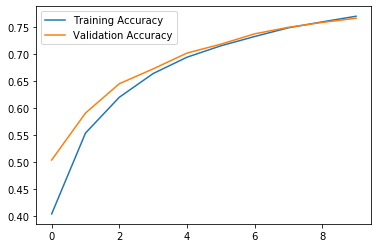

In [26]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['Training Accuracy','Validation Accuracy'])

#### Changing the batch size and epoch

In [27]:
cnn2 = get_model()
history = cnn2.fit(x_train, T_train,
                  batch_size=50, epochs=15,
                  validation_data=(x_test, T_test))

Train on 54740 samples, validate on 23460 samples
Epoch 1/15
54740/54740 [==============================] - 75s 1ms/step - loss: 1.9450 - accuracy: 0.4779 - val_loss: 1.5028 - val_accuracy: 0.5905
Epoch 2/15
54740/54740 [==============================] - 74s 1ms/step - loss: 1.3493 - accuracy: 0.6286 - val_loss: 1.2394 - val_accuracy: 0.6598
Epoch 3/15
54740/54740 [==============================] - 73s 1ms/step - loss: 1.1631 - accuracy: 0.6755 - val_loss: 1.1106 - val_accuracy: 0.6935
Epoch 4/15
54740/54740 [==============================] - 75s 1ms/step - loss: 1.0546 - accuracy: 0.7039 - val_loss: 1.0315 - val_accuracy: 0.7130
Epoch 5/15
54740/54740 [==============================] - 72s 1ms/step - loss: 0.9787 - accuracy: 0.7235 - val_loss: 0.9739 - val_accuracy: 0.7286
Epoch 6/15
54740/54740 [==============================] - 73s 1ms/step - loss: 0.9207 - accuracy: 0.7383 - val_loss: 0.9237 - val_accuracy: 0.7411
Epoch 7/15
54740/54740 [==============================] - 75s 1ms/st

In [33]:
scores = cnn2.evaluate(x_test, T_test, verbose=0)
print("Accuracy: %.2f%%" % (scores[1]*100))

Accuracy: 80.24%


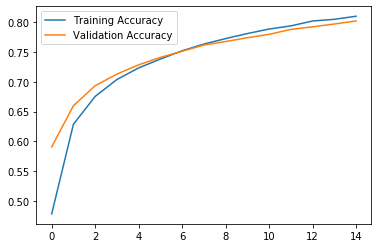

In [29]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['Training Accuracy','Validation Accuracy'])

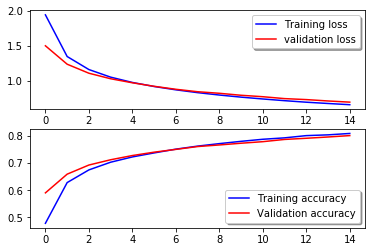

In [30]:
fig, ax = plt.subplots(2,1)
ax[0].plot(history.history['loss'], color='b', label="Training loss")
ax[0].plot(history.history['val_loss'], color='r', label="validation loss",axes =ax[0])
legend = ax[0].legend(loc='best', shadow=True)

ax[1].plot(history.history['accuracy'], color='b', label="Training accuracy")
ax[1].plot(history.history['val_accuracy'], color='r',label="Validation accuracy")
legend = ax[1].legend(loc='best', shadow=True)

In [31]:
# create the sklearn model for the network
model_init_batch_epoch_CV = KerasClassifier(build_fn=get_model, verbose=1)

# Using hyperparameters batch size and epochs
batches = [100, 50, 30]
epochs = [10, 15]
learn_rate = [0.001, 0.01]

# grid search for batch size and number of epochs
param_grid = dict(epochs=epochs, batch_size=batches, learn_rate=learn_rate)
grid = GridSearchCV(estimator=model_init_batch_epoch_CV, 
                    param_grid=param_grid,
                    cv=3)
grid_result = grid.fit(x_train, T_train)

Epoch 1/10
36493/36493 [==============================] - 32s 889us/step - loss: 2.2026 - accuracy: 0.4081
Epoch 2/10
36493/36493 [==============================] - 31s 852us/step - loss: 1.4467 - accuracy: 0.5904
Epoch 3/10
36493/36493 [==============================] - 31s 845us/step - loss: 1.2402 - accuracy: 0.6451
Epoch 4/10
36493/36493 [==============================] - 31s 851us/step - loss: 1.1172 - accuracy: 0.6793
Epoch 5/10
36493/36493 [==============================] - 31s 851us/step - loss: 1.0328 - accuracy: 0.7038
Epoch 6/10
36493/36493 [==============================] - 31s 857us/step - loss: 0.9683 - accuracy: 0.7218
Epoch 7/10
36493/36493 [==============================] - 32s 865us/step - loss: 0.9146 - accuracy: 0.7360
Epoch 8/10
36493/36493 [==============================] - 31s 863us/step - loss: 0.8714 - accuracy: 0.7486
Epoch 9/10
36493/36493 [==============================] - 31s 863us/step - loss: 0.8329 - accuracy: 0.7593
Epoch 10/10
18247/18247 [============

36493/36493 [==============================] - 33s 911us/step - loss: 0.8272 - accuracy: 0.7608
Epoch 13/15
36493/36493 [==============================] - 33s 910us/step - loss: 0.8033 - accuracy: 0.7677
Epoch 14/15
36493/36493 [==============================] - 33s 901us/step - loss: 0.7817 - accuracy: 0.7745
Epoch 15/15
18247/18247 [==============================] - 5s 283us/step
Epoch 1/15
36493/36493 [==============================] - ETA: 0s - loss: 2.2440 - accuracy: 0.39 - 35s 946us/step - loss: 2.2430 - accuracy: 0.3910
Epoch 2/15
36493/36493 [==============================] - 34s 945us/step - loss: 1.3968 - accuracy: 0.6040
Epoch 3/15
36493/36493 [==============================] - 36s 979us/step - loss: 1.1966 - accuracy: 0.6549
Epoch 4/15
36493/36493 [==============================] - 33s 907us/step - loss: 1.0797 - accuracy: 0.6859
Epoch 5/15
36493/36493 [==============================] - 33s 909us/step - loss: 0.9970 - accuracy: 0.7091
Epoch 6/15
36493/36493 [==============

36494/36494 [==============================] - 28s 759us/step - loss: 0.3219 - accuracy: 0.8973
Epoch 9/15
36494/36494 [==============================] - 27s 739us/step - loss: 0.2936 - accuracy: 0.9052
Epoch 10/15
36494/36494 [==============================] - 27s 738us/step - loss: 0.2693 - accuracy: 0.9134
Epoch 11/15
36494/36494 [==============================] - 27s 738us/step - loss: 0.2482 - accuracy: 0.9205
Epoch 12/15
36494/36494 [==============================] - 27s 742us/step - loss: 0.2288 - accuracy: 0.9270
Epoch 13/15
36494/36494 [==============================] - 27s 740us/step - loss: 0.2130 - accuracy: 0.9325
Epoch 14/15
36494/36494 [==============================] - 27s 744us/step - loss: 0.1986 - accuracy: 0.9365
Epoch 15/15
18246/18246 [==============================] - 3s 167us/step
Epoch 1/10
36493/36493 [==============================] - 33s 898us/step - loss: 2.3793 - accuracy: 0.3605
Epoch 2/10
36493/36493 [==============================] - 32s 864us/step - lo

36493/36493 [==============================] - 32s 875us/step - loss: 1.3335 - accuracy: 0.6217
Epoch 4/15
36493/36493 [==============================] - 32s 876us/step - loss: 1.1932 - accuracy: 0.6592s - loss: 1.1955 - accura - ETA: 0s - loss: 1.193
Epoch 5/15
36493/36493 [==============================] - 32s 873us/step - loss: 1.0970 - accuracy: 0.6865
Epoch 6/15
36493/36493 [==============================] - 32s 883us/step - loss: 1.0244 - accuracy: 0.7069
Epoch 7/15
36493/36493 [==============================] - 32s 879us/step - loss: 0.9660 - accuracy: 0.7242
Epoch 8/15
36493/36493 [==============================] - 32s 872us/step - loss: 0.9180 - accuracy: 0.7357
Epoch 9/15
36493/36493 [==============================] - 32s 882us/step - loss: 0.8766 - accuracy: 0.7475
Epoch 10/15
36493/36493 [==============================] - 32s 866us/step - loss: 0.8419 - accuracy: 0.7567
Epoch 11/15
36493/36493 [==============================] - 32s 867us/step - loss: 0.8127 - accuracy: 0.76

36493/36493 [==============================] - 32s 872us/step - loss: 0.1834 - accuracy: 0.9390
Epoch 14/15
36493/36493 [==============================] - 32s 871us/step - loss: 0.1680 - accuracy: 0.9454
Epoch 15/15
18247/18247 [==============================] - 5s 295us/step
Epoch 1/15
36494/36494 [==============================] - 32s 881us/step - loss: 1.5960 - accuracy: 0.5357
Epoch 2/15
36494/36494 [==============================] - 32s 876us/step - loss: 0.8681 - accuracy: 0.7343
Epoch 3/15
36494/36494 [==============================] - 32s 878us/step - loss: 0.6820 - accuracy: 0.7896
Epoch 4/15
36494/36494 [==============================] - 32s 878us/step - loss: 0.5747 - accuracy: 0.8225
Epoch 5/15
36494/36494 [==============================] - 32s 877us/step - loss: 0.5038 - accuracy: 0.8433s - loss: 0.504
Epoch 6/15
36494/36494 [==============================] - 32s 882us/step - loss: 0.4519 - accuracy: 0.8574
Epoch 7/15
36494/36494 [==============================] - 32s 883u

36494/36494 [==============================] - 37s 1ms/step - loss: 0.4421 - accuracy: 0.8599
Epoch 6/10
36494/36494 [==============================] - 37s 1ms/step - loss: 0.3950 - accuracy: 0.8721
Epoch 7/10
36494/36494 [==============================] - 37s 1ms/step - loss: 0.3579 - accuracy: 0.8853
Epoch 8/10
36494/36494 [==============================] - 37s 1ms/step - loss: 0.3263 - accuracy: 0.8941
Epoch 9/10
36494/36494 [==============================] - 37s 1ms/step - loss: 0.2987 - accuracy: 0.9036
Epoch 10/10
18246/18246 [==============================] - 6s 324us/step
Epoch 1/15
36493/36493 [==============================] - 37s 1ms/step - loss: 2.0567 - accuracy: 0.4456
Epoch 2/15
36493/36493 [==============================] - 37s 1ms/step - loss: 1.4864 - accuracy: 0.5913
Epoch 3/15
36493/36493 [==============================] - 37s 1ms/step - loss: 1.3055 - accuracy: 0.6383
Epoch 4/15
36493/36493 [==============================] - 37s 1ms/step - loss: 1.1905 - accuracy: 

36493/36493 [==============================] - 37s 1ms/step - loss: 0.3856 - accuracy: 0.8761 0s - loss: 0.385
Epoch 8/15
36493/36493 [==============================] - 37s 1ms/step - loss: 0.3543 - accuracy: 0.8858
Epoch 9/15
36493/36493 [==============================] - 37s 1ms/step - loss: 0.3290 - accuracy: 0.8938 1s
Epoch 10/15
36493/36493 [==============================] - 37s 1ms/step - loss: 0.3077 - accuracy: 0.9012
Epoch 11/15
36493/36493 [==============================] - 37s 1ms/step - loss: 0.2898 - accuracy: 0.9068
Epoch 12/15
36493/36493 [==============================] - 36s 996us/step - loss: 0.2720 - accuracy: 0.9129
Epoch 13/15
36493/36493 [==============================] - 37s 1ms/step - loss: 0.2564 - accuracy: 0.9172
Epoch 14/15
36493/36493 [==============================] - 37s 1ms/step - loss: 0.2444 - accuracy: 0.9213
Epoch 15/15
18247/18247 [==============================] - 6s 330us/step
Epoch 1/15
36494/36494 [==============================] - 38s 1ms/step 

In [32]:
# print results
print(f'Best Accuracy for {grid_result.best_score_:.4} using {grid_result.best_params_}')
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print(f'mean={mean:.4}, std={stdev:.4} using {param}')

Best Accuracy for 0.8809 using {'batch_size': 30, 'epochs': 15, 'learn_rate': 0.01}
mean=0.7433, std=0.008313 using {'batch_size': 100, 'epochs': 10, 'learn_rate': 0.001}
mean=0.8699, std=0.009162 using {'batch_size': 100, 'epochs': 10, 'learn_rate': 0.01}
mean=0.7755, std=0.01074 using {'batch_size': 100, 'epochs': 15, 'learn_rate': 0.001}
mean=0.8748, std=0.02031 using {'batch_size': 100, 'epochs': 15, 'learn_rate': 0.01}
mean=0.71, std=0.01366 using {'batch_size': 50, 'epochs': 10, 'learn_rate': 0.001}
mean=0.8657, std=0.02115 using {'batch_size': 50, 'epochs': 10, 'learn_rate': 0.01}
mean=0.7535, std=0.01575 using {'batch_size': 50, 'epochs': 15, 'learn_rate': 0.001}
mean=0.8713, std=0.02046 using {'batch_size': 50, 'epochs': 15, 'learn_rate': 0.01}
mean=0.7416, std=0.0274 using {'batch_size': 30, 'epochs': 10, 'learn_rate': 0.001}
mean=0.8738, std=0.01828 using {'batch_size': 30, 'epochs': 10, 'learn_rate': 0.01}
mean=0.7725, std=0.009696 using {'batch_size': 30, 'epochs': 15, 'le

In [35]:
cnn_best = get_model(learn_rate=0.01)

history_best = cnn2.fit(x_train, T_train,
                  batch_size=30, epochs=15,
                  validation_data=(x_test, T_test))

Train on 54740 samples, validate on 23460 samples
Epoch 1/15
54740/54740 [==============================] - 101s 2ms/step - loss: 0.6509 - accuracy: 0.8117 - val_loss: 0.6846 - val_accuracy: 0.8058
Epoch 2/15
54740/54740 [==============================] - 103s 2ms/step - loss: 0.6265 - accuracy: 0.8184 - val_loss: 0.6695 - val_accuracy: 0.8094
Epoch 3/15
54740/54740 [==============================] - 102s 2ms/step - loss: 0.6062 - accuracy: 0.8258 - val_loss: 0.6516 - val_accuracy: 0.8135
Epoch 4/15
54740/54740 [==============================] - 103s 2ms/step - loss: 0.5885 - accuracy: 0.8309 - val_loss: 0.6378 - val_accuracy: 0.8184
Epoch 5/15
54740/54740 [==============================] - 97s 2ms/step - loss: 0.5729 - accuracy: 0.8339 - val_loss: 0.6244 - val_accuracy: 0.8224
Epoch 6/15
54740/54740 [==============================] - 102s 2ms/step - loss: 0.5588 - accuracy: 0.8381 - val_loss: 0.6148 - val_accuracy: 0.8240
Epoch 7/15
54740/54740 [==============================] - 103s 

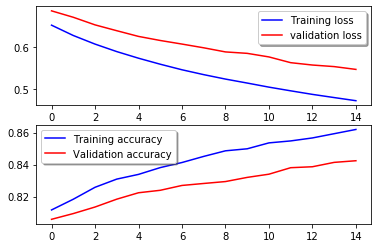

In [36]:
fig, ax = plt.subplots(2,1)
ax[0].plot(history_best.history['loss'], color='b', label="Training loss")
ax[0].plot(history_best.history['val_loss'], color='r', label="validation loss",axes =ax[0])
legend = ax[0].legend(loc='best', shadow=True)

ax[1].plot(history_best.history['accuracy'], color='b', label="Training accuracy")
ax[1].plot(history_best.history['val_accuracy'], color='r',label="Validation accuracy")
legend = ax[1].legend(loc='best', shadow=True)